# Part 0

In [34]:
import pandas as pd

data = pd.read_csv('/Users/OwenBarberie/Desktop/GSB_544/avocado-updated-2020.csv')
data.head(3)

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta


# Part 1

The dataset has information pertaining to avacados. The date variable shows the date of the observation. Average price shows the average price for avacados on that given day. Total volume represents the amount of sales. 4046, 4225, and 4770 all reflect the sizes categories for the avacados. The 4 "bag" variables show the size of the bags that avacados were sold in. Type is a variable that tells wether organic or convential. Year is the year of the date varible. Lastly, Geography tells the region where the data was collected. 

# Part 2

In [35]:
# Renaming some of the columns for readability/understanding 
data_cleaned = data.rename(columns={'4046': 'small_avocados', '4225': 'large_avocados', '4770': 'xlarge_avocados'})

In [36]:
data['geography'].unique()
#Northeast, West, South, Midwest, Totals
mapping = {
    'Albany': 'Northeast',
    'Atlanta': 'South',
    'Baltimore/Washington': 'Northeast',
    'Boise': 'West',
    'Boston': 'Northeast',
    'Buffalo/Rochester': 'Northeast',
    'California': 'West',
    'Charlotte': 'South',
    'Chicago': 'Midwest',
    'Cincinnati/Dayton': 'Midwest',
    'Columbus': 'Midwest',
    'Dallas/Ft. Worth': 'South',
    'Denver': 'West',
    'Detroit': 'Midwest',
    'Grand Rapids': 'Midwest',
    'Great Lakes': 'Midwest',
    'Harrisburg/Scranton': 'Northeast',
    'Hartford/Springfield': 'Northeast',
    'Houston': 'South',
    'Indianapolis': 'Midwest',
    'Jacksonville': 'South',
    'Las Vegas': 'West',
    'Los Angeles': 'West',
    'Louisville': 'Midwest',
    'Miami/Ft. Lauderdale': 'South',
    'Midsouth': 'South',
    'Nashville': 'South',
    'New Orleans/Mobile': 'South',
    'New York': 'Northeast',
    'Northeast': 'Northeast',
    'Northern New England': 'Northeast',
    'Orlando': 'South',
    'Philadelphia': 'Northeast',
    'Phoenix/Tucson': 'West',
    'Pittsburgh': 'Northeast',
    'Plains': 'Midwest',
    'Portland': 'West',
    'Raleigh/Greensboro': 'South',
    'Richmond/Norfolk': 'South',
    'Roanoke': 'South',
    'Sacramento': 'West',
    'San Diego': 'West',
    'San Francisco': 'West',
    'Seattle': 'West',
    'South Carolina': 'South',
    'South Central': 'South',
    'Southeast': 'South',
    'Spokane': 'West',
    'St. Louis': 'Midwest',
    'Syracuse': 'Northeast',
    'Tampa': 'South',
    #'Total U.S.': 'Total U.S.',
    'West': 'West',
    'West Tex/New Mexico': 'West'

}

data_cleaned['region'] = data_cleaned['geography'].map(mapping)
data_cleaned.head(3)

,date,average_price,total_volume,small_avocados,large_avocados,xlarge_avocados,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,Northeast
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,Northeast
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,South


# Part 3

In [37]:
#Filter for organic small Hass avocados in 2017
small_avocados_2017 = data_cleaned[(data_cleaned['type'] == 'organic') & (data_cleaned['year'] == 2017)]

# Group by region and sum the total volume for small Hass avocados
total_sales_by_region_2017 = small_avocados_2017.groupby('region')['small_avocados'].sum()

# Find the region with the highest sales
top_region_2017 = total_sales_by_region_2017.idxmax(), total_sales_by_region_2017.max()

top_region_2017

('West', 5826061.33)

# Part 4

In [38]:
# Step 1: Convert the 'date' column to datetime format if it isn't already
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'])

# Step 2: Split the 'date' column into 'year', 'month', and 'day' columns
data_cleaned['year'] = data_cleaned['date'].dt.year
data_cleaned['month'] = data_cleaned['date'].dt.month
data_cleaned['day'] = data_cleaned['date'].dt.day

# Step 3: Group by 'month' and calculate the average total volume of avocado sales
avg_sales_by_month = data_cleaned.groupby('month')['total_volume'].mean()

# Step 4: Find the month with the highest average total volume
highest_avg_sales_month = avg_sales_by_month.idxmax()
highest_avg_sales_value = avg_sales_by_month.max()

# Month format is numeric, 1 = January, 2 = February .... 
highest_avg_sales_month , highest_avg_sales_value

(5, 1123632.254218107)

# Part 5

In [17]:
import numpy
from numpy import *
#makes a variable with all regions we are not interested in for metro
region = ['Northeast', 'Southeast','Midwest','Southwest & South Central', 'West','South Central','Plains','Great Lakes','Total U.S.', 'Midsouth' ]
#In a new column assigns non-metro to matching values for region and geography else gives it metro
data_cleaned['area'] = where(data_cleaned['geography'].isin(region), 'Non_metro','Metro')
#Filters the data to only have metro regions
metro_regions = data_cleaned[data_cleaned['area'] == 'Metro']
#groups the data by geographies and sums the total volume while sorting them from largest to smallest
metro_regions.groupby('geography').sum('total_volume').sort_values(by='total_volume', ascending = False)
metro_average = metro_regions.groupby('geography').mean('total_volume').sort_values(by='total_volume', ascending = False)
metro_averagetop5 = ['Los Angeles','New York', 'Dallas/Ft. Worth','Houston','Phoenix/Tucson']
#filter the original dataset to only have the 5 metro regions above
top5_metro = data_cleaned[data_cleaned['geography'].isin(metro_averagetop5)]
metro_average.head(8)

,average_price,total_volume,small_avocados,large_avocados,xlarge_avocados,total_bags,small_bags,large_bags,xlarge_bags,year,month,day
geography,,,,,,,,,,,,
California,1.445915,3.254719e+06,1.109099e+06,937281.344428,89021.415474,1.119318e+06,860409.791961,200993.142908,57914.611160,2017.460784,6.372549,15.529412
Los Angeles,1.311013,1.567566e+06,5.936972e+05,232323.264608,48539.839412,6.930059e+05,555156.720376,96552.233056,41296.893235,2017.460784,6.372549,15.529412
New York,1.659477,8.631458e+05,2.966018e+04,545481.112778,5713.390948,2.822735e+05,231466.437288,49336.938758,1470.095327,2017.460784,6.372549,15.529412
Dallas/Ft. Worth,1.076160,7.127519e+05,3.295946e+05,127929.248807,10748.742026,2.444793e+05,179586.615458,63310.788725,1581.920507,2017.460784,6.372549,15.529412
Houston,1.075752,6.876533e+05,3.009210e+05,126765.890033,11506.757843,2.484597e+05,141024.887827,104715.842598,2718.957026,2017.460784,6.372549,15.529412
Phoenix/Tucson,1.209297,6.250383e+05,2.939647e+05,120200.269853,5727.927516,2.051419e+05,94151.706013,110134.888873,855.306127,2017.460784,6.372549,15.529412
West Tex/New Mexico,1.252972,4.607743e+05,2.283463e+05,61954.106995,15811.134319,1.546628e+05,93258.268259,60192.368276,1212.161691,2017.466338,6.364532,15.525452
Denver,1.263088,4.541332e+05,8.573295e+04,121461.745474,7062.816944,2.398757e+05,86772.134575,151149.557990,1954.017974,2017.460784,6.372549,15.529412


<positron-console-cell-18>:10: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


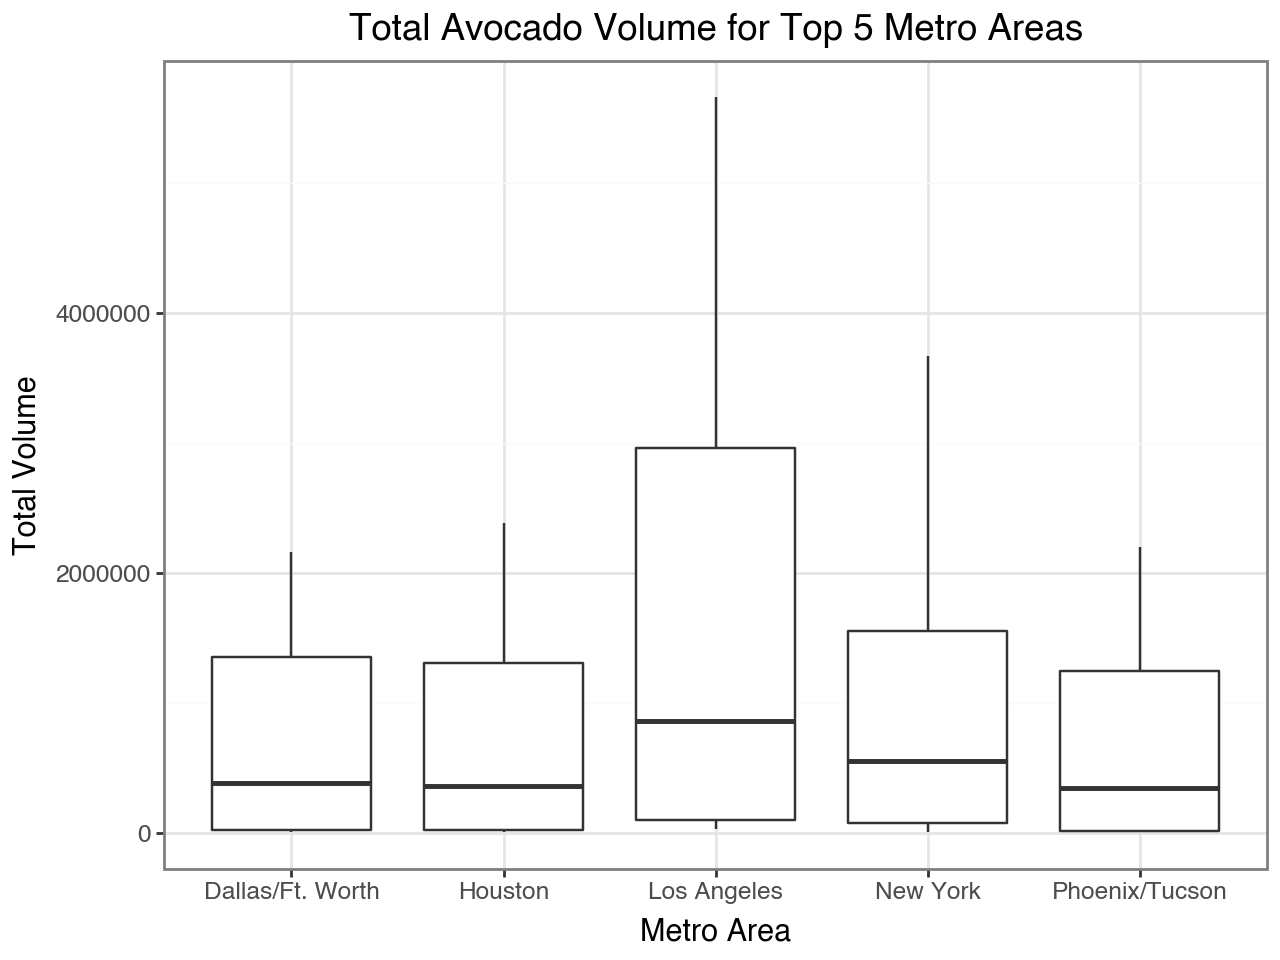

In [18]:
import pandas as pd
from plotnine import ggplot, aes, geom_boxplot, labs, theme_bw

# Filter the data to include only the 5 metro regions with the highest averages
top5_metro_regions = ['Los Angeles', 'New York', 'Dallas/Ft. Worth', 'Houston', 'Phoenix/Tucson']
top5_metro = data_cleaned[data_cleaned['geography'].isin(top5_metro_regions)]

# Create side-by-side box plots of total volume for the top 5 metro areas
# Plot the total avocado volume for the top 5 metro areas
print(
    ggplot(top5_metro, aes(x='geography', y='total_volume')) +
    geom_boxplot() +
    labs(title='Total Avocado Volume for Top 5 Metro Areas',
         x='Metro Area',
         y='Total Volume') +
    theme_bw()
)

# Part 6 and 7

In [40]:
# Filter the data to include only the four California regions
california_regions = ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']
california_data = data_cleaned[data_cleaned['geography'].isin(california_regions)]

# Display the new dataset
california_data.head(3)

,date,average_price,total_volume,small_avocados,large_avocados,xlarge_avocados,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,region,month,day
44,2015-01-04,0.85,2682159.95,1837999.65,524430.47,64225.78,255504.05,215571.80,36981.72,2950.53,conventional,2015,Los Angeles,West,1,4
45,2015-01-04,1.25,54495.54,47721.51,1723.40,0.00,5050.63,5050.63,0.00,0.00,organic,2015,Los Angeles,West,1,4
80,2015-01-04,1.05,430138.88,110693.69,270107.61,9737.50,39600.08,39600.08,0.00,0.00,conventional,2015,Sacramento,West,1,4


<positron-console-cell-47>:20: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


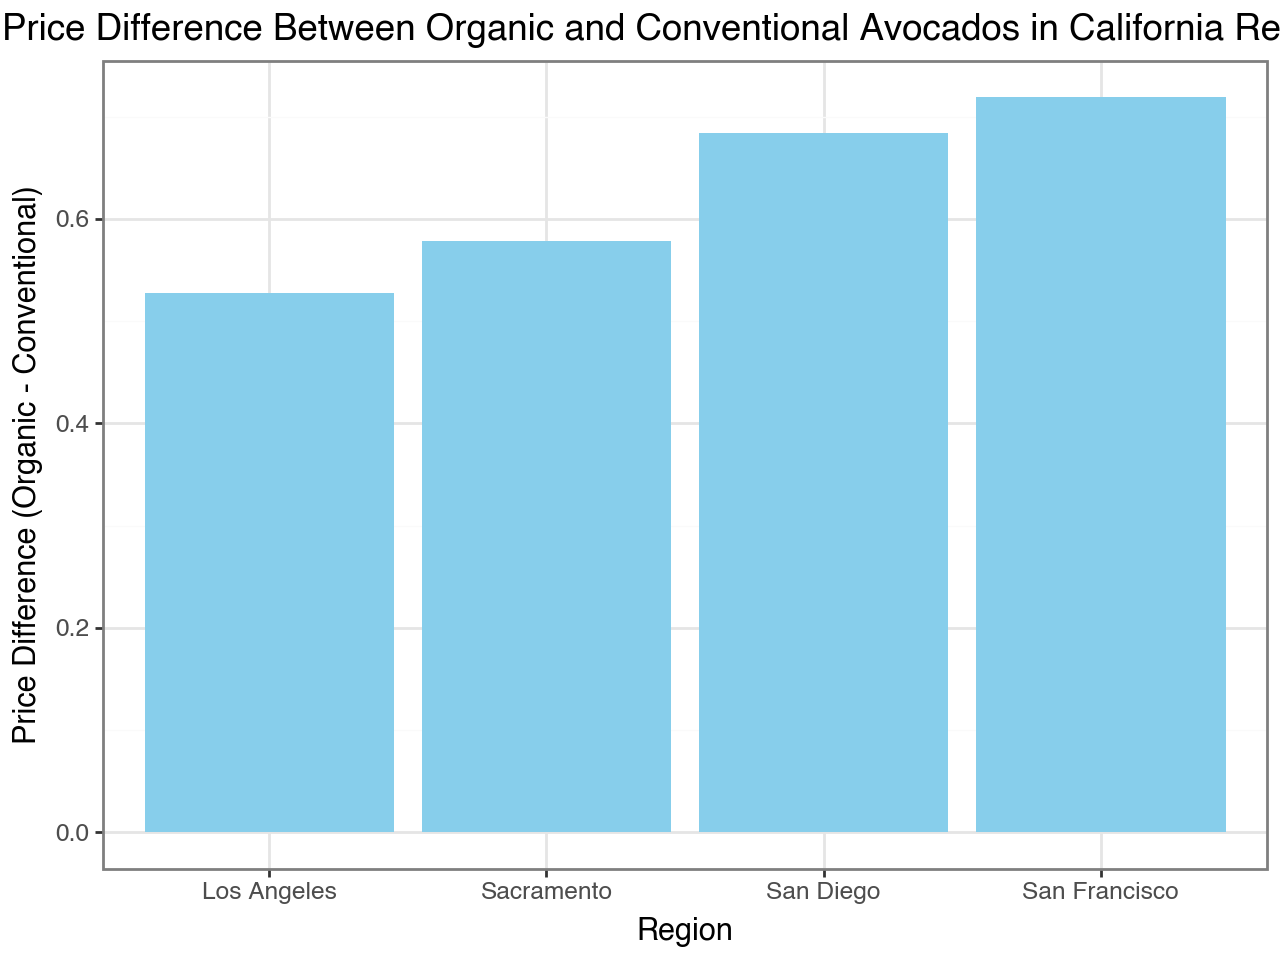

,geography,mean,median,min,max,std
0,Los Angeles,0.527778,0.527778,0.527778,0.527778,NaN
1,Sacramento,0.578497,0.578497,0.578497,0.578497,NaN
2,San Diego,0.684510,0.684510,0.684510,0.684510,NaN
3,San Francisco,0.718954,0.718954,0.718954,0.718954,NaN


In [47]:
import pandas as pd
from plotnine import ggplot, aes, geom_bar, labs, theme_bw

# Step 1: Filter the data to include only the four California regions
california_regions = ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']
california_data = data_cleaned[data_cleaned['geography'].isin(california_regions)]

# Step 2: Group the data by geography (region) and type (organic/conventional)
# Step 3: Calculate the average price for each type (organic vs. conventional)
price_comparison = california_data.groupby(['geography', 'type'])['average_price'].mean().unstack()

# Step 4: Calculate the difference in price between organic and conventional
price_comparison['price_difference'] = price_comparison['organic'] - price_comparison['conventional']

# Display the summary statistics (price difference by region)
price_comparison

# Step 5: Visualize the price differences using a bar plot
# Plot the price difference between organic and conventional avocados in California regions
print(
    ggplot(price_comparison.reset_index(), aes(x='geography', y='price_difference')) +
    geom_bar(stat='identity', fill='skyblue') +
    labs(title='Price Difference Between Organic and Conventional Avocados in California Regions',
         x='Region',
         y='Price Difference (Organic - Conventional)') +
    theme_bw()
)
# Step 6: create some summary statistics
summary_stats = price_comparison.groupby('geography')['price_difference'].agg(['mean', 'median', 'min', 'max', 'std']).reset_index()
summary_stats


# Part 8

In [42]:
# Step 1: Reshape the DataFrame using melt
plot = pd.melt(california_data, 
    id_vars=["geography", "type"], 
    value_vars=["small_avocados", "large_avocados", "xlarge_avocados"], 
    var_name="avocado_size", 
    value_name="volume")

# Step 2: Calculate the mean volume for each size, type, and region combination
avg_size = (plot.groupby(["avocado_size", "type", "geography"])["volume"]
    .mean()
    .reset_index())

# Step 3: Calculate the total volume for each type and geography
# Combine the mean calculation with the proportion in one go to avoid redundant steps
proportion = (avg_size.assign(total_volume=avg_size.groupby(["type", "geography"])["volume"].transform('sum'))
                      .assign(prop=lambda df: df["volume"] / df["total_volume"]))

# Step 4: Set the categorical order for 'avocado_size' for controlled plotting
proportion["avocado_size"] = pd.Categorical(proportion["avocado_size"], 
    categories=["small_avocados", "large_avocados", "xlarge_avocados"],
    ordered=True)


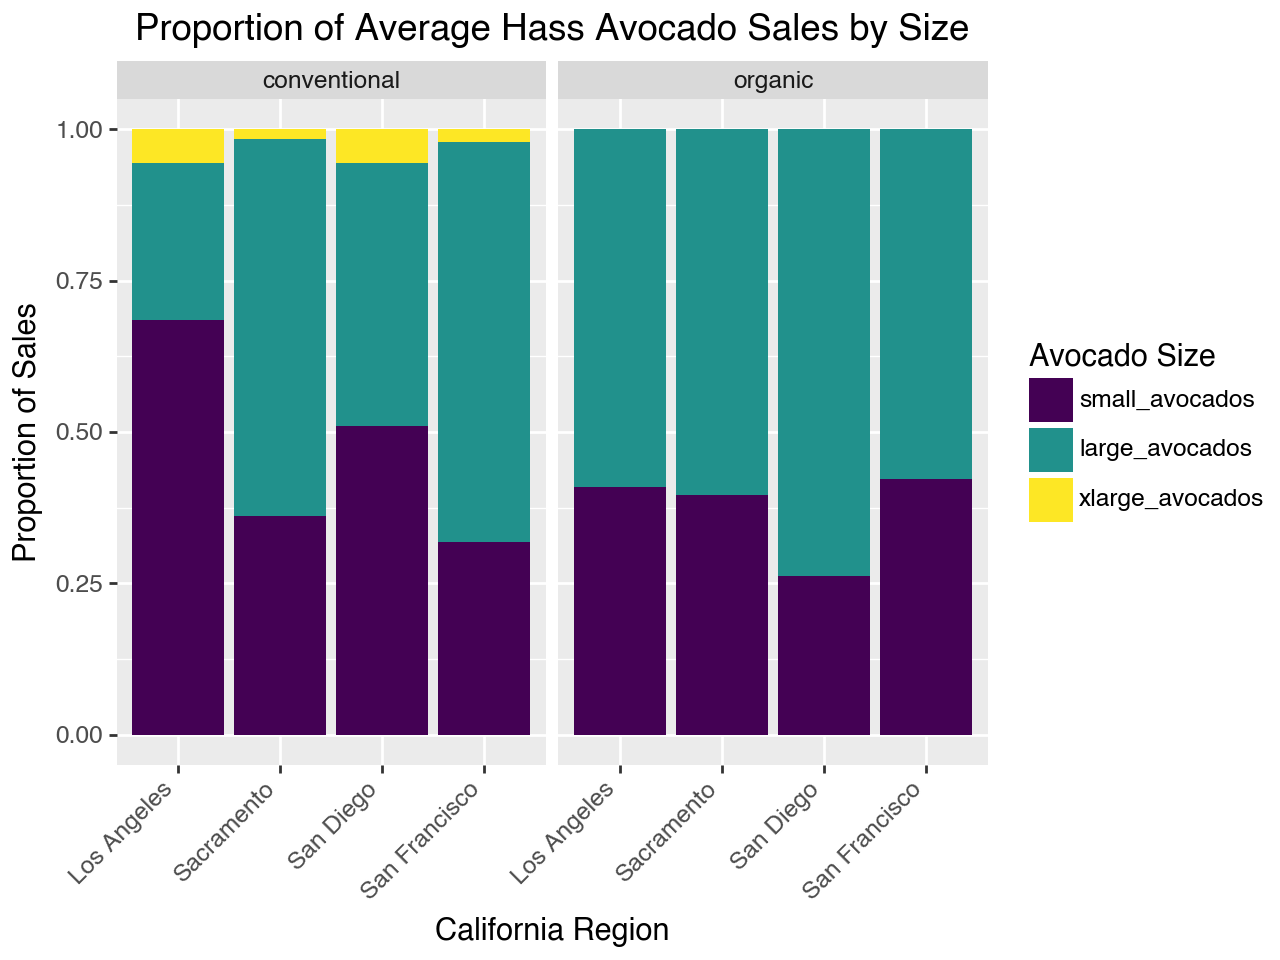

In [43]:
from plotnine import *

# Step 1: Create the stacked bar plot
(ggplot(proportion, aes(x='geography', y='prop', fill='avocado_size')) +
     geom_bar(stat='identity', position=position_stack(reverse=True)) +  # Stacked bar
     facet_wrap('~ type', ncol=2) +  # Separate plots for organic and conventional
     labs(title='Proportion of Average Hass Avocado Sales by Size',
          x='California Region',
          y='Proportion of Sales',
          fill='Avocado Size') +
     theme(axis_text_x = element_text(angle=45, hjust = 1)))

# Bonus Part NEW DATASET

In [48]:
import pandas as pd
import numpy as np

# Define the California regions (cities)
california_regions = ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']

# Generate random house prices (in $1000s) for 100 houses in each region
house_prices = pd.DataFrame({
    'geography': np.repeat(california_regions, 100),  # Each city will have 100 entries
    'house_price': np.concatenate([
        np.random.normal(700, 50, 100),  # Los Angeles house prices
        np.random.normal(650, 45, 100),  # San Diego house prices
        np.random.normal(500, 40, 100),  # Sacramento house prices
        np.random.normal(950, 60, 100)   # San Francisco house prices
    ])
})

In [27]:
# Join the house prices data with the avocado data
joined_data = pd.merge(california_data, house_prices, on='geography', how='left')

<positron-console-cell-29>:3: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


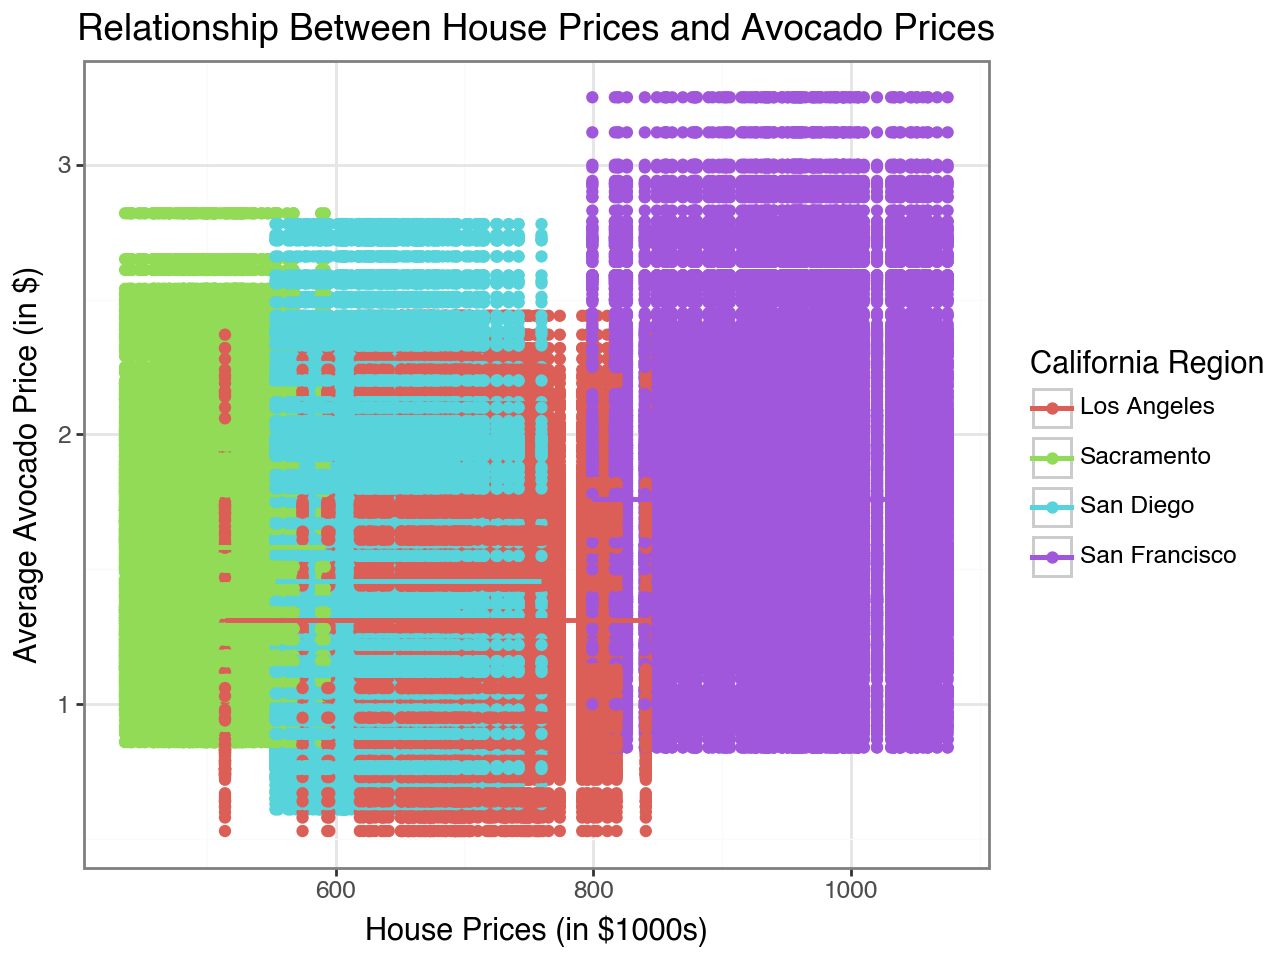

In [29]:
from plotnine import ggplot, aes, geom_point, geom_smooth, labs, theme_bw

print(
    ggplot(joined_data, aes(x='house_price', y='average_price', color='geography')) +
    geom_point() +
    geom_smooth(method='lm', se=False) +
    labs(title='Relationship Between House Prices and Avocado Prices',
         x='House Prices (in $1000s)',
         y='Average Avocado Price (in $)',
         color='California Region') +
    theme_bw()
)

If regions with higher house prices (e.g., San Francisco) also have higher avocado prices, you could argue that wealthier regions are more likely to purchase premium avocados, pushing prices up.

# Appendix

Chat GPT was used for the following parts: Part 8 (proportion, average, and use of facet), Bonus Part (creating the dataset) Additionally, Generative AI (and discord) was used heavily to debug the positron duplication glitch.